# Description of the project:
During the project I am going to classify Yelp Reviews into 1 star or 5 star categories basing on the text content in the reviews.

The dataset is from Kaggle platform : https://www.kaggle.com/c/yelp-recsys-2013

### Data:

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business.

The "cool" column is the number of "cool" votes this review received from other Yelp users, the "useful" and "funny" columns analogically.

### Imports

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Getting Data

In [56]:
yelp = pd.read_csv('yelp.csv')

In [57]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [58]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [59]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


### adding new column: lenght

In [60]:
yelp['length'] = yelp['text'].apply(lambda text: len(text.split()))

In [61]:
print(len(yelp['text'][0]))
print(yelp['length'][0])

889
155


## EDA

### Let's see the histograms of review length  for each star catgory

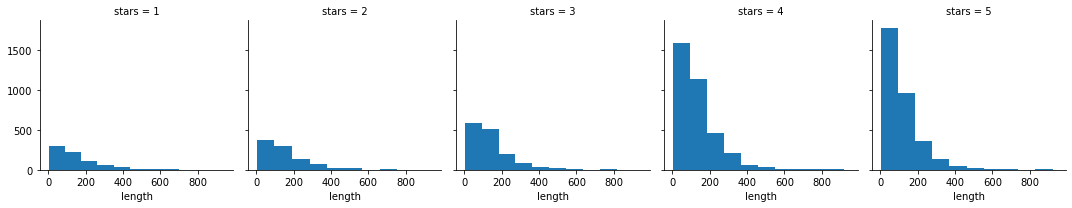

In [62]:
sns.FacetGrid(data = yelp,col='stars').map(plt.hist,'length')

#### Boxplot of review length for each star catgory

<AxesSubplot:xlabel='stars', ylabel='length'>

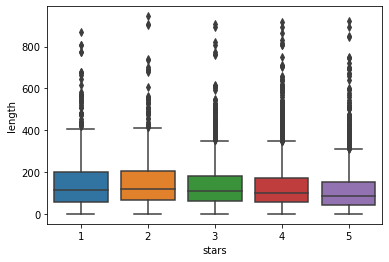

In [63]:
sns.boxplot(data = yelp, y = 'length', x = 'stars')

#### Countplot of the number of occurrences for each star rating

<AxesSubplot:xlabel='stars', ylabel='count'>

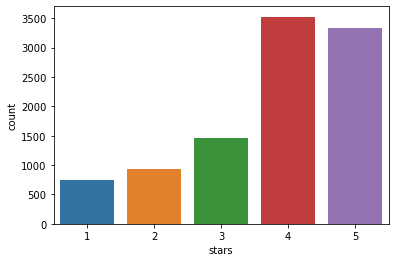

In [64]:
sns.countplot(data = yelp, x = 'stars')

#### mean for each star rating 

In [65]:
yelp.groupby(by = 'stars').mean()

,cool,useful,funny,length
stars,,,,
1,0.576769,1.604806,1.056075,153.953271
2,0.719525,1.563107,0.875944,156.435814
3,0.788501,1.306639,0.694730,140.714579
4,0.954623,1.395916,0.670448,131.174135
5,0.944261,1.381780,0.608631,114.463590


#### Correlation

In [66]:
yelp.groupby(by = 'stars').mean().corr()

,cool,useful,funny,length
cool,1.000000,-0.743329,-0.944939,-0.865362
useful,-0.743329,1.000000,0.894506,0.697506
funny,-0.944939,0.894506,1.000000,0.847204
length,-0.865362,0.697506,0.847204,1.000000


<AxesSubplot:>

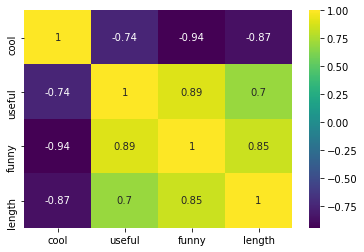

In [67]:
sns.heatmap(yelp.groupby(by = 'stars').mean().corr(),cmap="viridis",annot=True)

# NLP Classification task

Prediction stars which are 1 or 5

In [126]:
yelp = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,155
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,257
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,76
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,86
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,292


In [127]:
X = yelp['text']
y =yelp['stars'] 

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

In [129]:
cv = CountVectorizer()

In [130]:
X = cv.fit_transform(X)

# Train Test Split

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# Training a Naive Bayes Model

In [133]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [134]:
nb.fit(X_train,y_train)

MultinomialNB()

# Predictions and Evaluation

In [135]:
predictions = nb.predict(X_test)

In [136]:
from sklearn.metrics import classification_report

In [137]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.85      0.68      0.76       247
           5       0.93      0.97      0.95      1102

    accuracy                           0.92      1349
   macro avg       0.89      0.83      0.85      1349
weighted avg       0.92      0.92      0.92      1349



# Random Forest Classifier

In [138]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 200)

In [139]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [140]:
predictions = rfc.predict(X_test)

In [141]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.95      0.23      0.37       247
           5       0.85      1.00      0.92      1102

    accuracy                           0.86      1349
   macro avg       0.90      0.61      0.65      1349
weighted avg       0.87      0.86      0.82      1349



# Text Processing

In [142]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipeline with the following steps:CountVectorizer(), TfidfTransformer(),MultinomialNB()

In [153]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    #('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
    #('classifier',RandomForestClassifier())
])

### Train Test Split
because we overwrite X as the CountVectorized

In [154]:
X = yelp['text']
y =yelp['stars'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [155]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('classifier', MultinomialNB())])

In [156]:
predictions = pipeline.predict(X_test)

In [157]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.90      0.67      0.77       247
           5       0.93      0.98      0.96      1102

    accuracy                           0.93      1349
   macro avg       0.91      0.83      0.86      1349
weighted avg       0.92      0.93      0.92      1349

